In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
len(dataset)

68

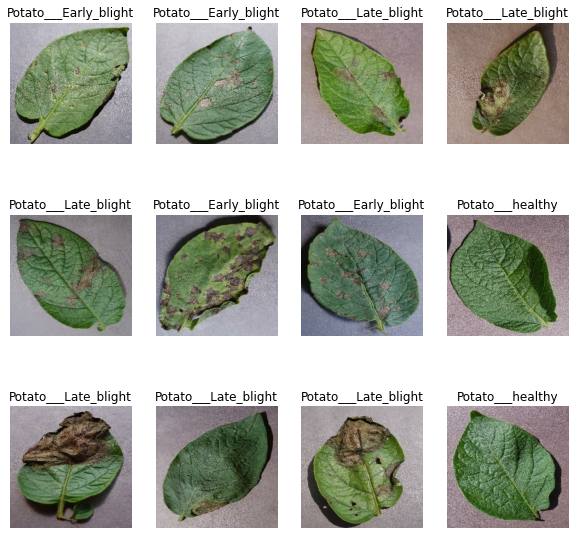

In [27]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [28]:
len(dataset)

68

In [ ]:
80%==>training
20%==>10% validation 10% test

In [30]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [32]:
train_ds=dataset.take(54)
len(train_ds)

54

In [43]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [34]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [37]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [45]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [51]:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [52]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [53]:
len(train_ds)

54

In [55]:
len(val_ds)

6

In [56]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [60]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [61]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [65]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_argumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_7 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [67]:
model.compile(
    optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy']
)

In [68]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 268s 5s/step - loss: 2.0709 - accuracy: 0.5041 - val_loss: 0.7432 - val_accuracy: 0.6823
Epoch 2/50
54/54 [==============================] - 231s 4s/step - loss: 0.7125 - accuracy: 0.7031 - val_loss: 0.5948 - val_accuracy: 0.7760
Epoch 3/50
54/54 [==============================] - 233s 4s/step - loss: 0.4755 - accuracy: 0.8160 - val_loss: 0.3209 - val_accuracy: 0.8802
Epoch 4/50
54/54 [==============================] - 233s 4s/step - loss: 0.3169 - accuracy: 0.8819 - val_loss: 0.3755 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 232s 4s/step - loss: 0.2814 - accuracy: 0.8872 - val_loss: 0.2559 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 233s 4s/step - loss: 0.3130 - accuracy: 0.8808 - val_loss: 0.1921 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 232s 4s/step - loss: 0.2298 - accuracy: 0.9074 - val_loss: 0.2516 - val_accuracy: 0.9167
Epoch 8/50
54

In [69]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 8s 759ms/step - loss: 0.0488 - accuracy: 0.9766


In [70]:
scores

[0.04884267598390579, 0.9765625]

In [71]:
history

In [72]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [73]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [76]:
history.history['accuracy']

[0.5040509104728699,
 0.703125,
 0.8159722089767456,
 0.8819444179534912,
 0.8871527910232544,
 0.8807870149612427,
 0.9074074029922485,
 0.9201388955116272,
 0.9091435074806213,
 0.9189814925193787,
 0.9369212985038757,
 0.9265046119689941,
 0.9311342835426331,
 0.9398148059844971,
 0.9473379850387573,
 0.9317129850387573,
 0.9398148059844971,
 0.9502314925193787,
 0.953125,
 0.9444444179534912,
 0.9519675970077515,
 0.9560185074806213,
 0.9542824029922485,
 0.953125,
 0.9525462985038757,
 0.9461805820465088,
 0.9386574029922485,
 0.9456018805503845,
 0.9652777910232544,
 0.9635416865348816,
 0.9519675970077515,
 0.9646990895271301,
 0.9589120149612427,
 0.96875,
 0.953125,
 0.9664351940155029,
 0.9629629850387573,
 0.9716435074806213,
 0.9716435074806213,
 0.9756944179534912,
 0.9762731194496155,
 0.9716435074806213,
 0.9409722089767456,
 0.9710648059844971,
 0.9670138955116272,
 0.9693287014961243,
 0.9716435074806213,
 0.9733796119689941,
 0.9837962985038757,
 0.9739583134651184]

In [77]:
len(history.history['accuracy'])

50

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

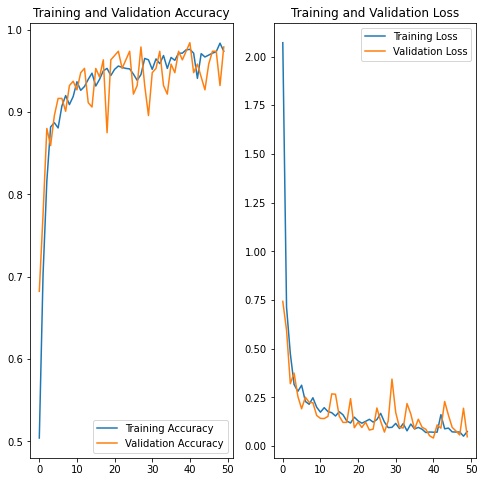

In [81]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [91]:
import numpy as np

first image to predict
first image's actual label: Potato___Late_blight
predicted label: Potato___Early_blight


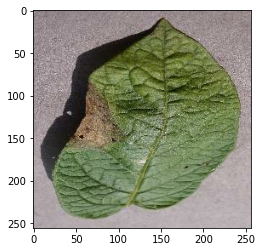

In [115]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [117]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.argmax(predictions[0])),2)
    return predicted_class, confidence

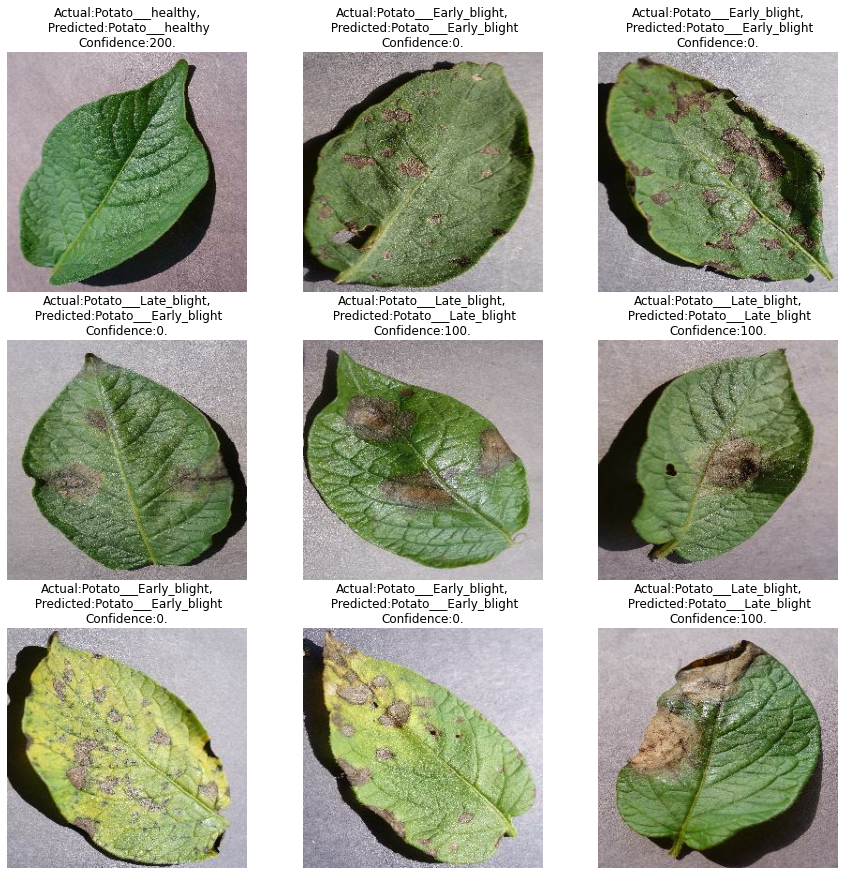

In [128]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}\nConfidence:{confidence}.")
        
        plt.axis('off')

In [130]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets
